In [1]:
from pathlib import Path
import gc
from matplotlib import pyplot as plt 
import numpy as np
import random
import math

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
if torch.cuda.is_available():
    device = "cuda" 
else:
    device = "cpu"
print(device)

cuda


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [4]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    data_path = Path("drive")
    data_path/="MyDrive"
    data_path/="Data"
else:
    data_path = Path("Data")

In [5]:
for file_path in data_path.iterdir():
    if file_path.is_file():
        file_path_str = str(file_path)
        if "test" in file_path_str:
            test_path = file_path
        elif "train" in file_path_str:
            train_path = file_path
        elif "valid" in file_path_str:
            valid_path = file_path
        else:
            words_path = file_path
print(test_path, train_path, valid_path, words_path)

Data\ptb.test.txt Data\ptb.train.txt Data\ptb.valid.txt Data\words.txt


In [6]:
from LSTM_module import Trainer

In [7]:
trainer = Trainer(device=device)

In [8]:
trainer.load_dictionary(words_path)

print(f'bos: {trainer.words_dict["<bos>"]}, eos: {trainer.words_dict["<eos>"]}, eps: {trainer.words_dict["<eps>"]}, unk: {trainer.words_dict["<unk>"]}')

print(trainer.vocab_size)

bos: 1, eos: 10004, eps: 0, unk: 3
10005


In [9]:
trainer.load_data(train_path, data_type="train")
trainer.load_data(valid_path, data_type="valid")
trainer.load_data(test_path, data_type="test")

In [10]:
trainer.init_model()

In [11]:
trainer.init_train()

In [12]:
trainer.model.embedding

Embedding(10005, 400)

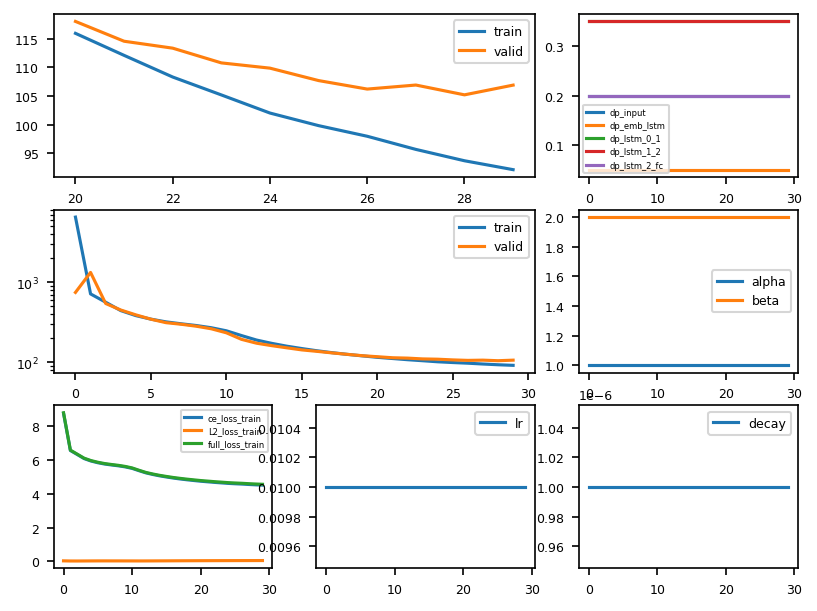

min val ppx:  105.18; last val ppx: 106.89 last train ppx: 92.11
total elapsed time:  15 mins 27 seconds


In [14]:
trainer.train(20)

0.05

In [21]:
trainer.set_param("dropout_words", 0.35)
trainer.set_param("dropout_emb_lstm_0", 0.2)

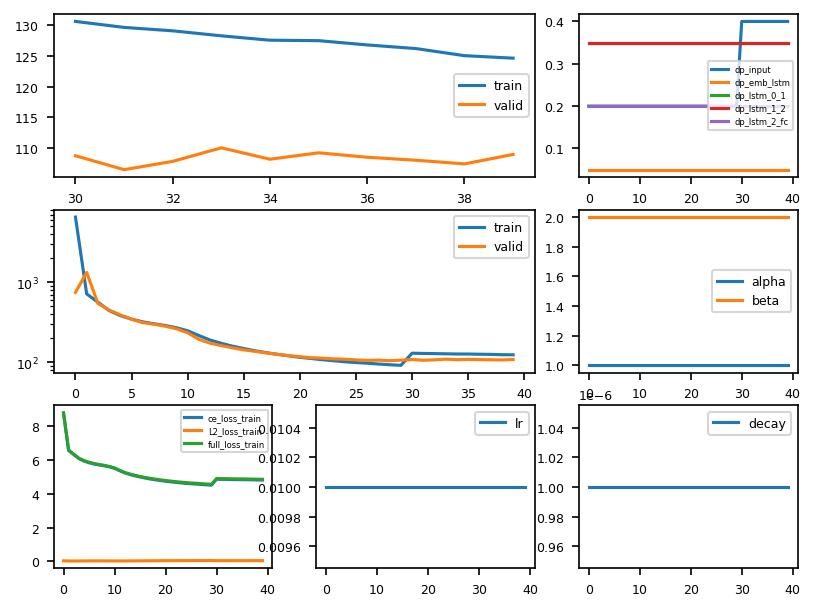

min val ppx:  105.18; last val ppx: 109.00 last train ppx: 124.61
total elapsed time:  7 mins 30 seconds


In [16]:
trainer.train(10)

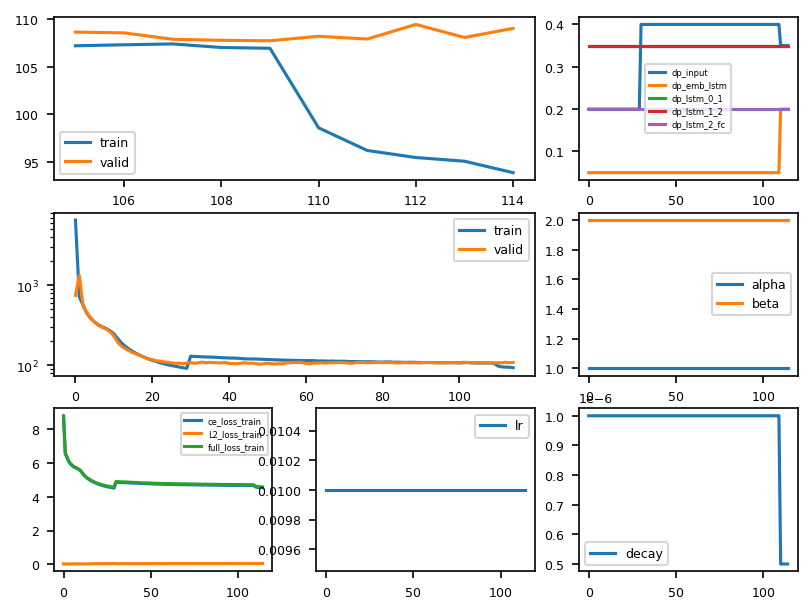

min val ppx:  103.53; last val ppx: 109.03 last train ppx: 93.85
total elapsed time:  4 mins 7 seconds


In [22]:
trainer.train(5)

In [38]:
trainer.set_param("dropout_emb_lstm_0", 0.2)

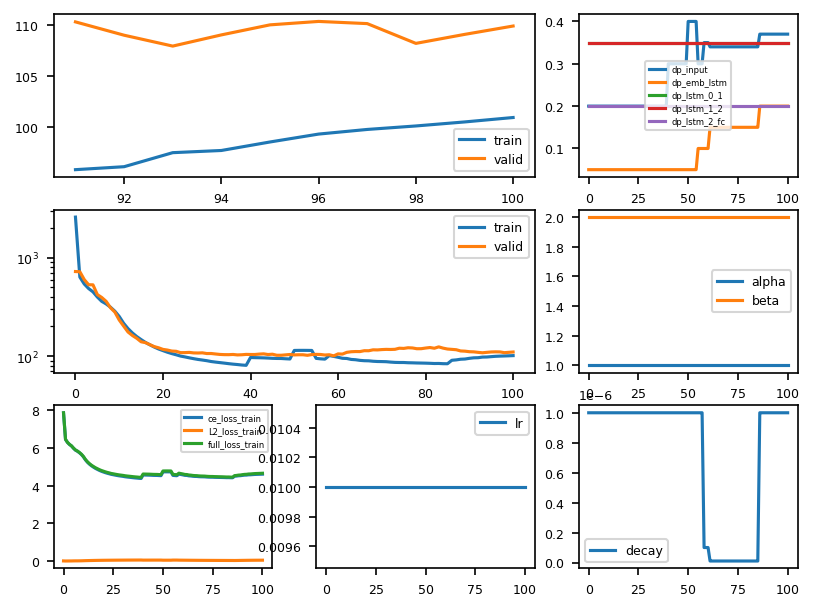

min val ppx:  100.31; last val ppx: 109.88 last train ppx: 100.94
total elapsed time:  7 mins 54 seconds


In [20]:
trainer.set_param("decay", 5e-7)

In [ ]:
trainer.set_param("dropout_words", 5e-7)

In [ ]:
trainer.set_param("dropout_emb_lstm_0", 5e-7)

In [ ]:
trainer.set_param("dropout_lstm_0_lstm_1", 5e-7)

In [ ]:
trainer.set_param("dropout_lstm_1_lstm_2", 5e-7)

In [ ]:
trainer.set_param("dropout_lstm_2_fc", 5e-7)

In [ ]:
trainer.set_param("lr", 5e-7)

In [ ]:
trainer.set_param("max_norm", 5e-7)

In [ ]:
trainer.set_param("base_seq_len", 5e-7)